important librariies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


load dataset

In [2]:
from google.colab import files
import zipfile
import pandas as pd
import os

# 📤 Step 1: Upload ZIP file manually
uploaded = files.upload()

# 📦 Step 2: Extract ZIP contents
for fn in uploaded.keys():
    print(f"Uploaded file: {fn}")
    with zipfile.ZipFile(fn, 'r') as zip_ref:
        zip_ref.extractall("/content/")  # extract all files to /content

# 📁 Step 3: Find extracted CSV file automatically
csv_file = None
for file in os.listdir("/content/"):
    if file.endswith(".csv"):
        csv_file = os.path.join("/content/", file)
        break

# 🧾 Step 4: Load dataset into DataFrame
if csv_file:
    df = pd.read_csv(csv_file, sep=';')  # Kaggle dataset uses semicolon (;) separator
    print("Data Loaded Successfully from:", csv_file)
    print(df.head())
else:
    print("CSV file not found in the ZIP. Check ZIP contents.")


Saving archive student.zip to archive student.zip
Uploaded file: archive student.zip
Data Loaded Successfully from: /content/student-por.csv
  school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0  GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mot...                                                                                                                                                                                 
1  GP,F,17,U,GT3,T,1,1,at_home,other,course,fathe...                                                                                                                                                                                 
2  GP,F,15,U,LE3,T,1,1,at_home,other,other,mother...                                                                                                                     

Load dataset

In [3]:
import os

# adjust to your extracted file path
df = pd.read_csv("/content/student-mat.csv")

print("✅ Data Loaded Successfully!")
print(df.head())


✅ Data Loaded Successfully!
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


Basic EDA

In [4]:
print(df.info())
print(df.describe())
print("\nMissing Values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Basic EDA

In [5]:
print(df.info())
print(df.describe())
print("\nMissing Values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

VISUALIZATION

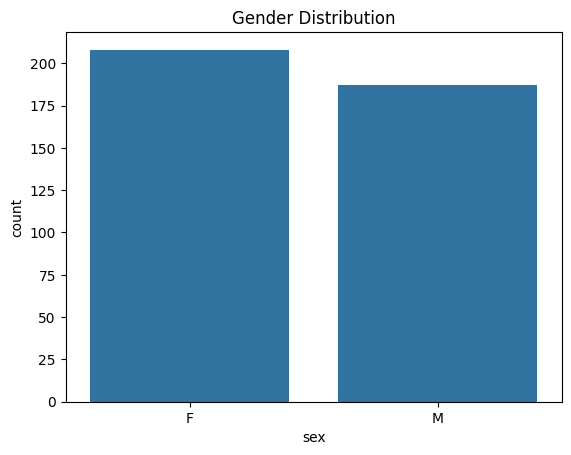

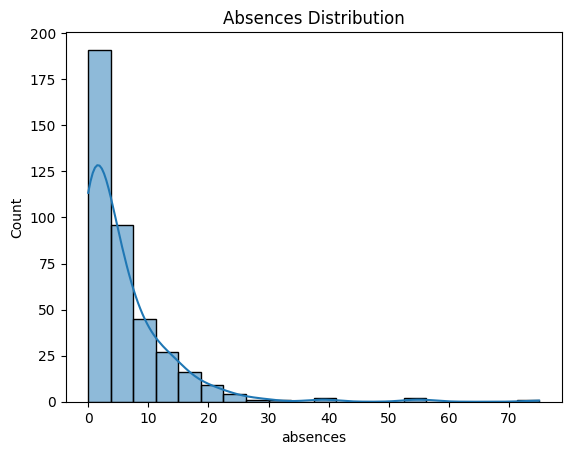

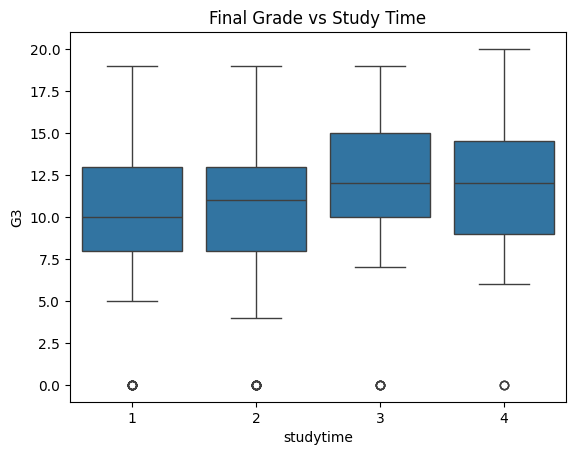

In [6]:
sns.countplot(x='sex', data=df)
plt.title("Gender Distribution")
plt.show()

sns.histplot(df['absences'], bins=20, kde=True)
plt.title("Absences Distribution")
plt.show()

sns.boxplot(x='studytime', y='G3', data=df)
plt.title("Final Grade vs Study Time")
plt.show()


PREPARE DATA

In [7]:
y = (df['G3'] > 10).astype(int)  # Pass/Fail
X = df.drop(columns=['G3'])
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("✅ Data Split Done")


✅ Data Split Done


TRAIN DECSION TREE

In [8]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

print("✅ Decision Tree Model Trained")


✅ Decision Tree Model Trained


PREDICTION AND EVALAUTION

Accuracy: 0.9113924050632911

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91        38
           1       0.95      0.88      0.91        41

    accuracy                           0.91        79
   macro avg       0.91      0.91      0.91        79
weighted avg       0.91      0.91      0.91        79



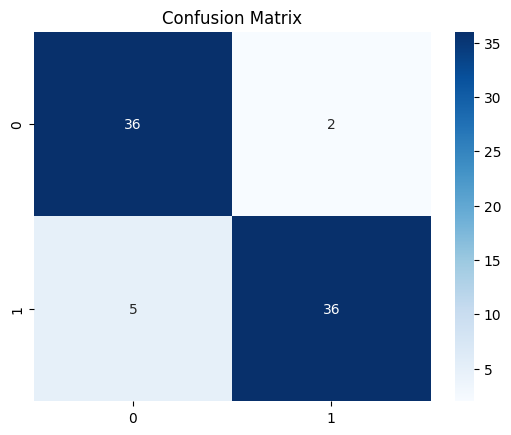

In [9]:
y_pred = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


VISUALIZE TREES

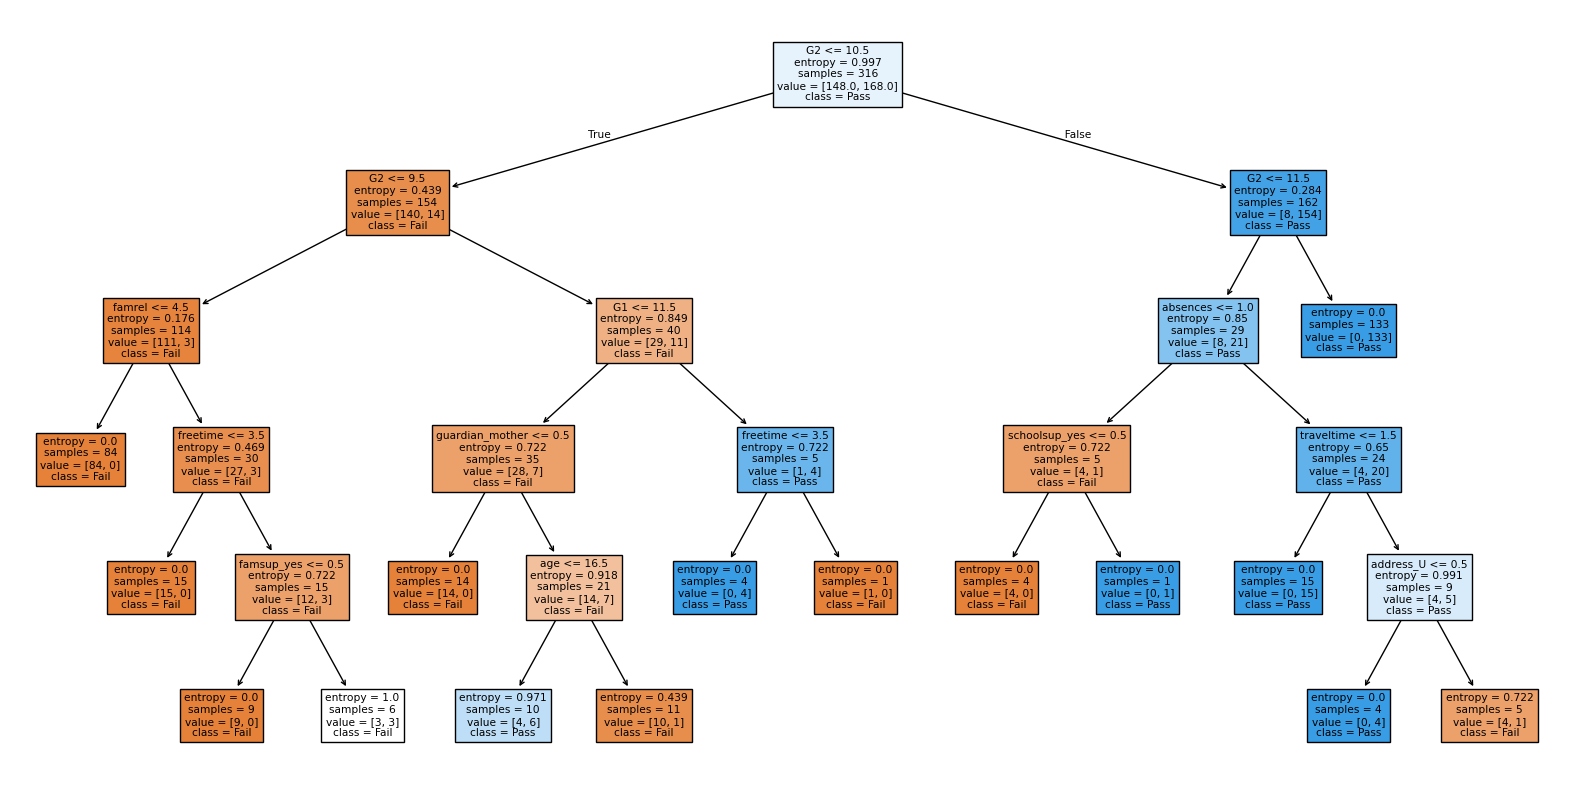

In [10]:
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Fail', 'Pass'])
plt.show()
